In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal, standard_normal as std_normal

# Movement Generation Function (MGF)

$$ f_t(x) = E_x[e^{tx}] $$

## MGF for the Normal Distribution
let $x\sim \mathcal{N(\mu, \sigma^2)} $

\begin{aligned}
f_x(t) &= E_x[e^{tx}] \\
&= \int^{\infty}_{-\infty} \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2} + tx} dx \\
&= \int^{\infty}_{-\infty} \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{\left(x-(\mu+t\sigma^2)\right)^2}{2\sigma^2}}\cdot e^{\mu t+\frac{\sigma^2 t^2}{2}} dx \\
&= e^{\mu t+\frac{\sigma^2 t^2}{2}}\cdot E_x[1] \\
&= e^{\mu t+\frac{\sigma^2 t^2}{2}}
\end{aligned}

### Check $f_x(t)=E_x[e^{tx}]$

In [56]:
def f(x,t):
    T,X = np.meshgrid(t,x)
    return np.mean(np.exp(X*T), axis=0)

n = 1000
x1 = np.linspace(0,2,n)
x2 = std_normal(n)

t = np.linspace(-10, 10,n)

y1 = f(x1, t)
y2 = f(x2, t)

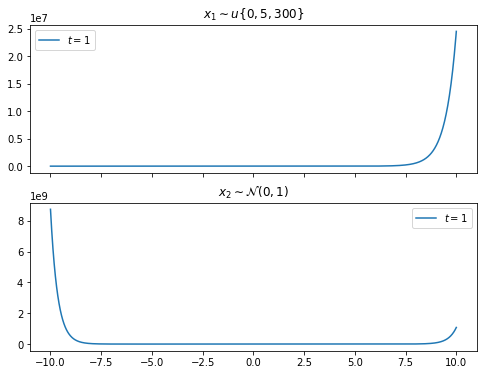

In [57]:
fig = plt.figure(figsize=(8,6))

ax = plt.subplot(2,1,1)
plt.xticks(visible=False)
plt.title(r'$x_1\sim u\{0,5,300\}$')
plt.plot(t, y1, label=rf'$t=1$')
plt.legend()

plt.subplot(2,1,2, sharex=ax)
plt.title(r'$x_2\sim \mathcal{N}(0,1)$')
plt.plot(t, y2, label=rf'$t=1$')
plt.legend()

plt.show()

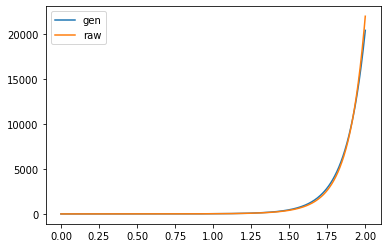

In [90]:
from scipy.stats import norm

mu, sigma = 1,2
x = normal(mu, sigma, 10000)
t = np.linspace(0,2,300)
T, X = np.meshgrid(t,x)
y = np.mean(np.exp(T*X), axis=0).reshape(-1)

plt.plot(t, y, label='gen')
plt.plot(t, np.exp(mu*t + 0.5*(sigma**2)*(t**2)), label='raw')
plt.legend()